coral-app.py is a Flask app which exposes a tensorflow model as an endpoint. To run the app and expose over a network: 

 $ python3 coral-app.py

Then use curl to query:

In [9]:
!curl -X POST -F image=@images/people_car.jpg 'http://localhost:5000/predict'

{"predictions":[{"bounding_box":"[[838.28767776 135.01444817]\n [918.52632523 407.59171486]]","label":"person","label_id":"0","score":"0.953125"},{"bounding_box":"[[302.61314392 115.93628883]\n [613.56708527 361.15774155]]","label":"car","label_id":"2","score":"0.91015625"},{"bounding_box":"[[226.53522491 143.4629488 ]\n [350.92689514 374.7155571 ]]","label":"person","label_id":"0","score":"0.58203125"},{"bounding_box":"[[215.56240082 212.26049423]\n [346.96146011 419.5057869 ]]","label":"bicycle","label_id":"1","score":"0.26953125"},{"bounding_box":"[[422.38025665 171.35490417]\n [454.58913803 210.01939774]]","label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":"[[359.79752541 161.47656441]\n [389.19482231 204.61996078]]","label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":"[[305.36413193 147.99462318]\n [346.20672226 211.31177902]]","label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":"[[ 5.55360764  9.35606182]\n [21.93799496 45.29603

Alternatively we can use requests

In [10]:
import requests

PREDICT_URL = 'http://localhost:5000/predict'
IMAGE_PATH = "images/people_car.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

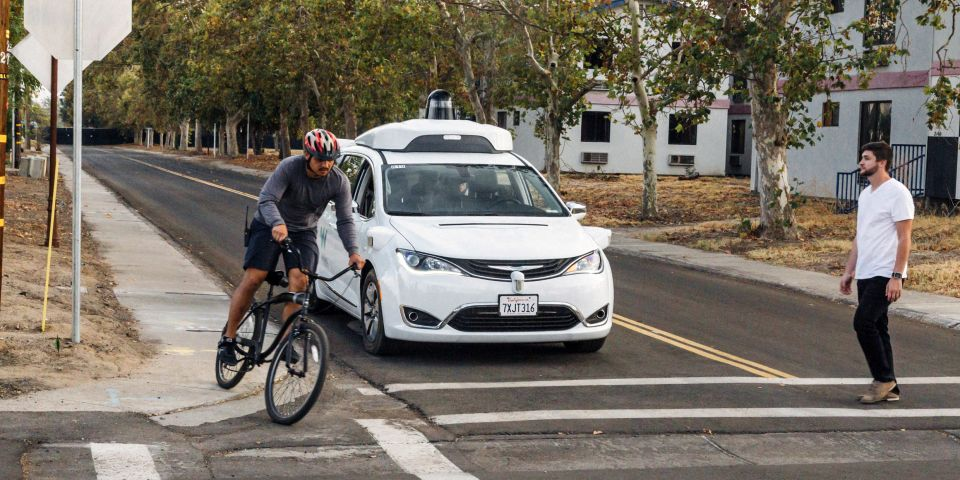

In [11]:
from IPython.display import Image
Image(IMAGE_PATH)

In [12]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 2.19 ms, sys: 4.51 ms, total: 6.7 ms
Wall time: 48.6 ms


In [13]:
response.status_code

200

In [14]:
response.json()

{'predictions': [{'bounding_box': '[[838.28767776 135.01444817]\n [918.52632523 407.59171486]]',
   'label': 'person',
   'label_id': '0',
   'score': '0.953125'},
  {'bounding_box': '[[302.61314392 115.93628883]\n [613.56708527 361.15774155]]',
   'label': 'car',
   'label_id': '2',
   'score': '0.91015625'},
  {'bounding_box': '[[226.53522491 143.4629488 ]\n [350.92689514 374.7155571 ]]',
   'label': 'person',
   'label_id': '0',
   'score': '0.58203125'},
  {'bounding_box': '[[215.56240082 212.26049423]\n [346.96146011 419.5057869 ]]',
   'label': 'bicycle',
   'label_id': '1',
   'score': '0.26953125'},
  {'bounding_box': '[[422.38025665 171.35490417]\n [454.58913803 210.01939774]]',
   'label': 'person',
   'label_id': '0',
   'score': '0.2109375'},
  {'bounding_box': '[[359.79752541 161.47656441]\n [389.19482231 204.61996078]]',
   'label': 'person',
   'label_id': '0',
   'score': '0.2109375'},
  {'bounding_box': '[[305.36413193 147.99462318]\n [346.20672226 211.31177902]]',
   

Display predictions

In [15]:
from PIL import Image, ImageDraw

In [16]:
image_pil = Image.open(IMAGE_PATH)

In [17]:
draw = ImageDraw.Draw(image_pil)

In [22]:
for prediction in response.json()['predictions']:
    draw.rectangle(prediction['bounding_box'].tolist(), outline='red')

AttributeError: 'str' object has no attribute 'tolist'

In [20]:
?draw.rectangle

Signature: draw.rectangle(xy, fill=None, outline=None, width=0)
Docstring: Draw a rectangle.
File:      ~/anaconda3/lib/python3.7/site-packages/PIL/ImageDraw.py
Type:      method


In [24]:
response.json()['predictions'][0]['bounding_box']

'[[838.28767776 135.01444817]\n [918.52632523 407.59171486]]'